[[1. 2.]
 [4. 3.]
 [7. 6.]]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
     sepallength  sepalwidth  petallength  petalwidth           class
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica
150
float64
3.758666666666666
0.7631607417008411


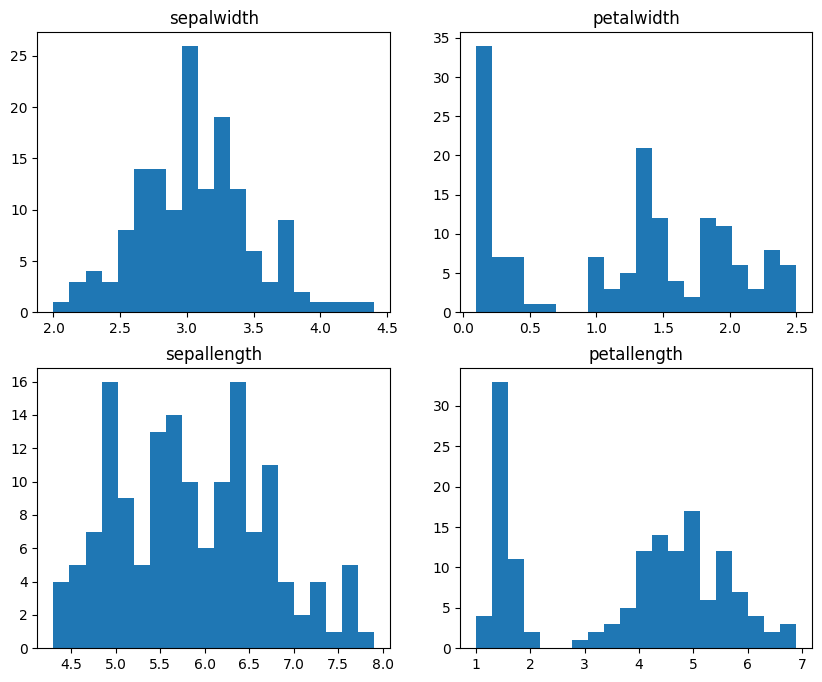

<Axes: xlabel='petallength', ylabel='petalwidth'>

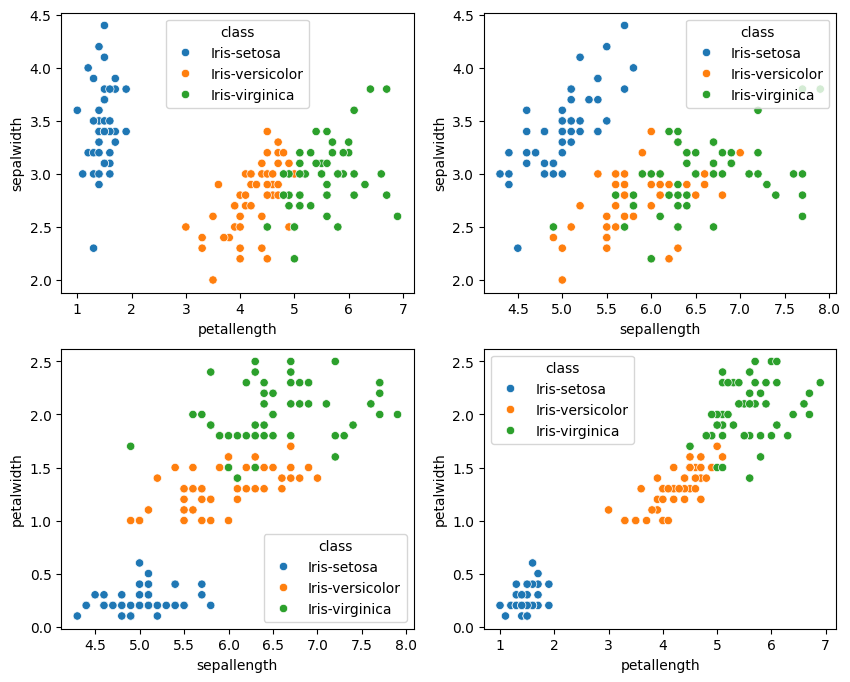

In [38]:
#ASSIGNMENT 1 A

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
X = [[1,2],[np.nan,3],[7,6]]
print(SimpleImputer().fit_transform(X)) 

from sklearn.preprocessing import MinMaxScaler
Y = [[-1,2],[-0.5,6],[0,10],[1,18]]
print(MinMaxScaler().fit_transform(Y))

df = pd.read_csv("iris.csv")
print(df.head())
print(df.tail())
print(len(df['sepallength']) - df['sepallength'].isnull().sum())
print(df['petalwidth'].dtype)
print(df['petallength'].mean())
print(df['petalwidth'].std())

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,0].hist(df['sepalwidth'], bins=20)
ax[0,1].hist(df['petalwidth'], bins=20)
ax[1,0].hist(df['sepallength'], bins=20)
ax[1,1].hist(df['petallength'], bins=20)
ax[0,0].title.set_text("sepalwidth")
ax[0,1].title.set_text("petalwidth")
ax[1,0].title.set_text("sepallength")
ax[1,1].title.set_text("petallength")
plt.show()


fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.scatterplot(data=df,x=df['petallength'],y=df['sepalwidth'],hue='class',ax=ax[0,0])
sns.scatterplot(data=df,x=df['sepallength'],y=df['sepalwidth'],hue='class',ax=ax[0,1])
sns.scatterplot(data=df,x=df['sepallength'],y=df['petalwidth'],hue='class',ax=ax[1,0])
sns.scatterplot(data=df,x=df['petallength'],y=df['petalwidth'],hue='class',ax=ax[1,1])

    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             6.7             0.580         0.08             1.8      0.097   
10            5.6             0.615         0.00             1.6      0.089   
11            7.8             0.610         0.29    

<BarContainer object of 1143 artists>

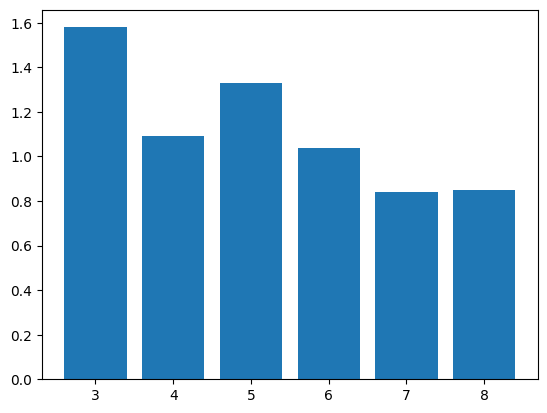

In [44]:
#ASSIGNMENT 1B

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('WineQT.csv')
print(df.head(20))
print(df.info())
print(df.quantile(0.25))
print(df.quantile(0.75))
print(df.isnull())

plt.bar(df['quality'],df['volatile_acidity'])

In [ ]:
#ASSIGNMENT 2

from sklearn.preprocessing import RobustScaler
X =[[1,-2,2],[-2,1,3],[4,1,-2]]
X_scaled = RobustScaler().fit_transform(X)
print(X_scaled)

from sklearn.preprocessing import StandardScaler
Y = [[5],[10],[12],[14],[18],[23],[49]]
Y_scaled = StandardScaler().fit_transform(Y)
Y_Robust = RobustScaler().fit_transform(Y)
print(Y_scaled)
print(Y_Robust)

Z = [[1,-1,2],[2,0,0],[0,1,-1]]
Z_scaled = StandardScaler().fit_transform(Z)
print(Z_scaled)

from sklearn.preprocessing import MaxAbsScaler
Z_Max = MaxAbsScaler().fit_transform(Z)
print(Z_Max)

from sklearn.preprocessing import OneHotEncoder
A = [['Male',1],['Female',3],['Female',2]]
A_scaled = OneHotEncoder().fit_transform(A)
print(A_scaled)

from sklearn.preprocessing import MultiLabelBinarizer
print(MultiLabelBinarizer().fit_transform([{'sci-fi','thriller'},{'comedy'}]))


In [ ]:
#ASSIGNMENT 3B

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn. metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.30)

Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

X_train_scaled_2d = X_train_scaled[:, :2]
X_test_scaled_2d = X_test_scaled[:, :2]

model = KNeighborsClassifier(n_neighbors=11, weights='uniform')
model2 = KNeighborsClassifier(n_neighbors=11,weights='distance')
model.fit(X_train_scaled,y_train)
model2.fit(X_train_scaled,y_train)

y_pred_1 = model.predict(X_test_scaled)
y_pred_2 = model2.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred_1))
print(accuracy_score(y_test, y_pred_2))


#Plot deciion boundary and 3A remaining


1.0
1.0


In [81]:
#ASSIGNMENT 4.1

from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, mutual_info_regression

data = fetch_california_housing()

X = data['data']
y = data['target']

X_california = X[:2000,:]
y_California = y[:2000]

print(X_california.shape)
selector = SelectKBest(score_func=mutual_info_regression, k=3)
X_selected = selector.fit_transform(X_california, y_California)
print(X_selected.shape)

from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(score_func=mutual_info_regression,percentile=30)
X_selected = selector.fit_transform(X_california, y_California)
print(X_selected.shape)


(2000, 8)
(2000, 3)
(2000, 3)


In [121]:
#ASSIGNMENT 4 B

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

X, y = make_friedman1(n_samples= 200, n_features=10, random_state=42)
print(X.shape)

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
X_selected = rfe.fit_transform(X, y)
print(X_selected.shape)
print(rfe.ranking_)
#print(X[rfe.get_support(indices=True)])

from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
X_california = california_housing.data
y_california = california_housing.target

model = LinearRegression()
selector = SelectFromModel(model, max_features=3)
selector = selector.fit(X_california, y_california)

X_selected = selector.transform(X_california)
print(X_selected.shape)

selector = SequentialFeatureSelector(model, n_features_to_select=3)
selector = selector.fit(X_california, y_california)

X_selected = selector.transform(X_california)
X_selected = selector.transform(X_california)
print(X_selected.shape)
print(selector.get_support(indices = True))

(200, 10)
(200, 3)
[1 1 5 1 2 4 6 7 8 3]
(20640, 3)
(20640, 3)
[0 1 2]


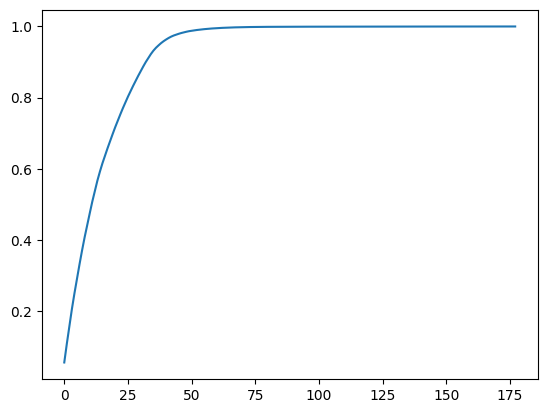

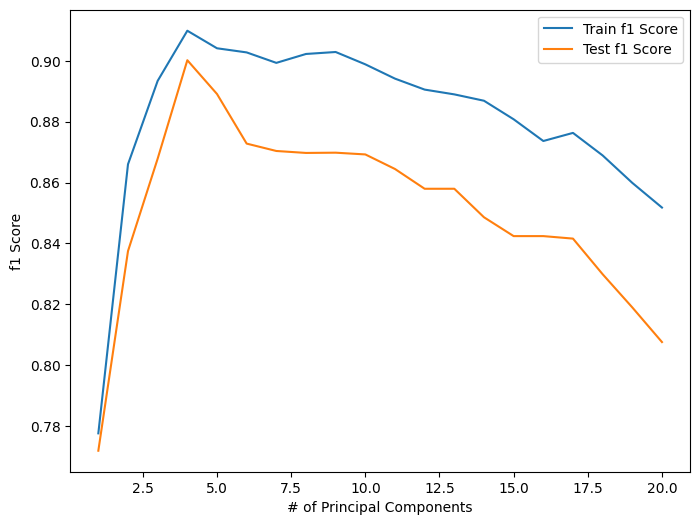

Train f1 Score: 0.9098660170523751
Test f1 Score: 0.9001782531194296
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2285
           1       0.95      0.86      0.90       590

    accuracy                           0.96      2875
   macro avg       0.96      0.92      0.94      2875
weighted avg       0.96      0.96      0.96      2875



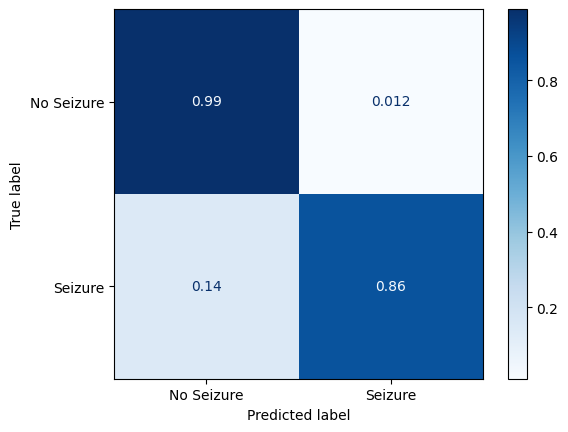

In [139]:
#ASSIGNMENT 5

from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay

df = pd.read_csv("Epileptic Seizure Recognition.csv")

df = df.drop('Unnamed', axis =1)
X = df.drop('y', axis=1)
df['y'] = [1 if x == 1 else 0 for x in y]
y = df['y']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=178)
X_pca = pca.fit_transform(X_scaled)

cum_exp =[]
exp_var = 0
for i in pca.explained_variance_ratio_:
    exp_var += i
    cum_exp.append(exp_var)
plt.plot(cum_exp)

train_f1 = []
test_f1 = []

for i in range(20):

    X = X_pca[:,0:i+1]

    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

    # Perform feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit k-NN classifier and make predictions
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))

# Plot accuracy by n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(range(1,21), train_f1, label='Train f1 Score')
plt.plot(range(1,21), test_f1, label='Test f1 Score')
plt.ylabel('f1 Score')
plt.xlabel('# of Principal Components')
plt.legend()
plt.show()

X = X_pca[:,0:4]

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit k-NN classifier and make predictions
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))
#ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=['No Seizure','Seizure'], cmap='Blues', normalize= 'true')

In [ ]:
#ASSIGNMENT 6

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

#SelectKBest using chi2 test
test = SelectKBest(score_func=chi2, k=4)
X_new = test.fit_transform(X, y)

print(X_new)

#Printing the indices
indices = test.get_support(indices=True)
print(indices)
features = X.columns[indices]
print("Top 4 using chi squared:")
print(features)

X_selected = X[features]

rfe = RFE(LogisticRegression(), n_features_to_select=3)
fit = rfe.fit(X_selected, y)

top_features = X_selected.columns[fit.support_]
print(top_features)




[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]
[1 4 5 7]
Top 4 using chi squared:
Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')
     Glucose  Insulin   BMI  Age
0        148        0  33.6   50
1         85        0  26.6   31
2        183        0  23.3   32
3         89       94  28.1   21
4        137      168  43.1   33
..       ...      ...   ...  ...
763      101      180  32.9   63
764      122        0  36.8   27
765      121      112  26.2   30
766      126        0  30.1   47
767       93        0  30.4   23

[768 rows x 4 columns]
Index(['Glucose', 'BMI', 'Age'], dtype='object')


In [164]:
#ASSIGNMENT 7

from sklearn.linear_model import LinearRegression

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42, test_size=0.30)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

from sklearn.datasets import load_diabetes
diab = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diab.data, diab.target, random_state=42, test_size=0.30)

model_in = LinearRegression(fit_intercept=True)
model_in.fit(X_train, y_train)
y_pred = model_in.predict(X_test)
print(model_in.score(X_test, y_test))
print(model_in.intercept_)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(model.intercept_)
print(model.coef_)


0.595770232606166
0.4772897164322617
151.00821291456543
0.4772897164322617
151.00821291456543
[  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]


Datatypes 
 age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object
LAST 5 ROWS 
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
292      0   0     2          1  
293      1   0     2          1  
294      1   0     2          1  
295      0   0     0          0  
296      0   0     2          1  


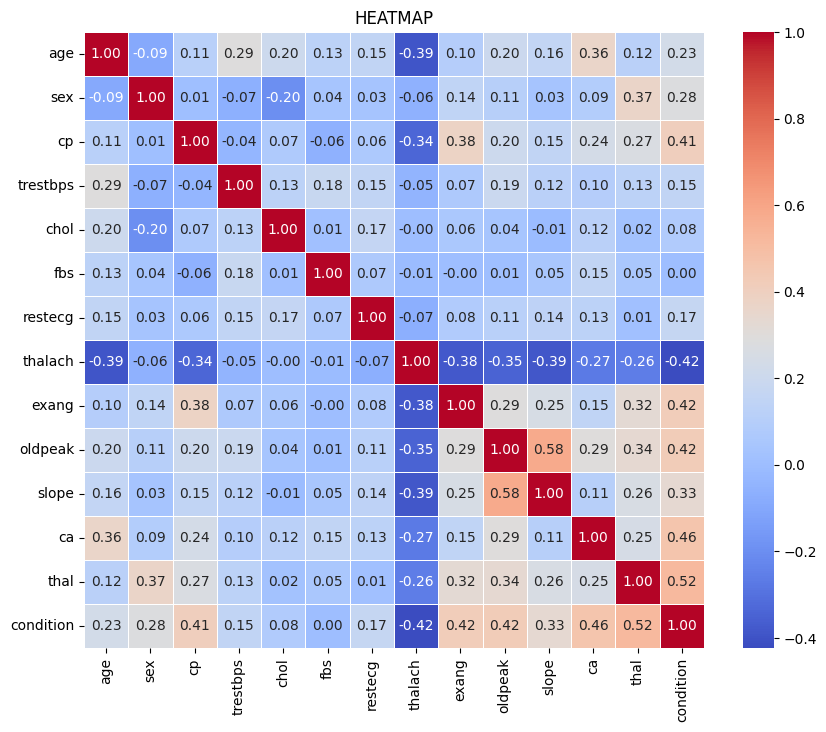

[[23  9]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [ ]:
#ASSIGNMENT 8A

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv("heart_cleveland_upload.csv")
print("Datatypes \n",df.dtypes)
print("LAST 5 ROWS \n",df.tail())

# Experiment with the database by attempting to 
# distinguish presence (values 1,2,3,4) from absence (value 0
# Change instances with labels 2,3 and to 1.
df['target'] = [1 if x > 0 else 0 for x in df['condition']]

# The feature 'ca' has missing values that are given as '?'. 
# Let us replace the '?' with nan and then fill those missing values using 'mean' imputation strategy.
df['ca'] = df['ca'].replace('?', np.nan)
df['ca'] = df['ca'].fillna(df['ca'].mean)

# Remove the target variable from heart_data
df.drop('target', axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
corrmatrix = df.corr()
sns.heatmap(corrmatrix, cmap='coolwarm', annot=True, fmt='0.2f', linewidths=0.5)
plt.title("HEATMAP")
plt.show()

X = df.drop('condition' , axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled,y_test)

print(confusion_matrix(y_test,model.predict(X_test_scaled)))
print(classification_report(y_test,model.predict(X_test_scaled)))



In [34]:
#ASSIGNMENT 8B
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split


df = pd.read_csv('Hitters.csv')
#print(df.dtypes)
#print(df.describe())
#print(df.isnull().sum())

df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'])

from scipy.stats import zscore
df['z_sal'] = zscore(df['Salary'])
outliers = df[abs(df['z_sal']) > 3]
#print(outliers)

X = df.drop( ['Unnamed: 0', 'Salary', 'z_sal'], axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OLS Regression
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_train_score = ols.score(X_train, y_train)
ols_test_score = ols.score(X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

print("OLS Train R-squared:", ols_train_score)
print("OLS Test R-squared:", ols_test_score)
print("Ridge Train R-squared:", ridge_train_score)
print("Ridge Test R-squared:", ridge_test_score)
print("Lasso Train R-squared:", lasso_train_score)
print("Lasso Test R-squared:", lasso_test_score)

OLS Train R-squared: 0.4608485168880925
OLS Test R-squared: 0.3368958572786389
Ridge Train R-squared: 0.4608461105427857
Ridge Test R-squared: 0.3368477499028699
Lasso Train R-squared: 0.4608434310283487
Lasso Test R-squared: 0.33698873270155416


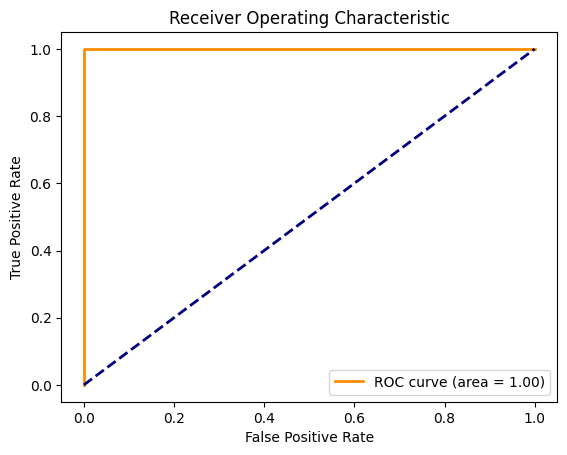

AUC score: 1.0


In [49]:
#ASSIGNMENT 14.1

from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

X = X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['target']
y_binary = y.where(y == 0, other=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
auc_score = auc(fpr,tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC score:", roc_auc_score(y_test, y_pred_proba))

['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


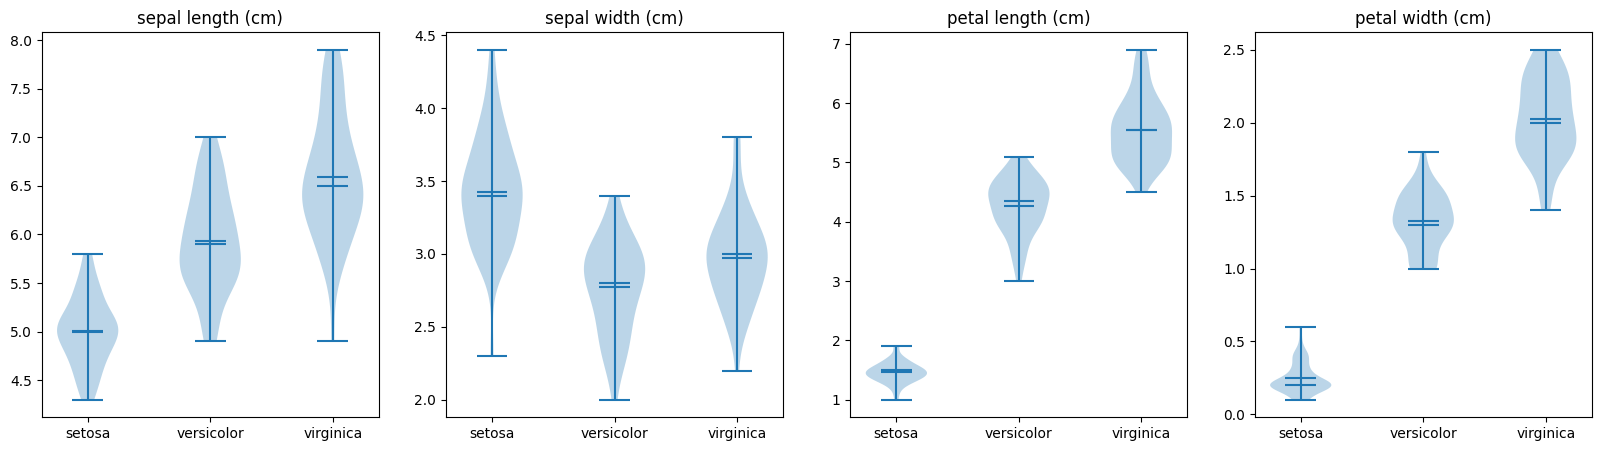

In [61]:
#ASSIGNMENT 14.2

# Load the Iris dataset
iris = load_iris()
# Extract the species and features
species = iris.target_names
features = iris.feature_names
data = iris.data

print(species, features)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, feature in enumerate(features):
    axs[i].violinplot([data[iris.target == j,i] for j in range(len(species))], showmeans=True, showextrema=True, showmedians=True)
    axs[i].set_title(feature)
    axs[i].set_xticks([1, 2, 3])
    axs[i].set_xticklabels(species)

plt.show()